# Code For Part B
This code should generate all Figures used in Part B

In [133]:
import numpy as np
import matplotlib.pyplot as plt

In [134]:
# Time settings
t_max = 30
h = 0.1
time = np.arange(0, t_max + h, h)

In [135]:
# Initial populations
P_deer_0 = 5
P_squirrel_0 = 23
P_turkey_0 = 35

In [136]:
# Carrying capacities and growth rates
L0 = {'deer': 400, 'squirrel': 4000, 'turkey': 500}
k0 = {'deer': 0.9, 'squirrel': 0.5, 'turkey': 0.32}

In [137]:
# Interaction coefficients
c = {
    'deer': {'squirrel': 0.03, 'turkey': 0.04},
    'squirrel': {'deer': 0.01, 'turkey': 0.04},
    'turkey': {'deer': 0.13, 'squirrel': 0.08},
}
d = {
    'deer': {'squirrel': 0.0002, 'turkey': 0.0004},
    'squirrel': {'deer': 0.0002, 'turkey': 0.0005},
    'turkey': {'deer': 0.0011, 'squirrel': 0.0006},
}

In [138]:
# Function to calculate dP/dt
def dP_dt(P):
    P_deer, P_squirrel, P_turkey = P
    P_dict = {'deer': P_deer, 'squirrel': P_squirrel, 'turkey': P_turkey}
    other_species = {'deer': ['squirrel', 'turkey'], 'squirrel': ['deer', 'turkey'], 'turkey': ['deer', 'squirrel']}
    
    dP = {}
    for sp in ['deer', 'squirrel', 'turkey']:
        j, k = other_species[sp]
        L = L0[sp] - c[sp][j] * P_dict[j] - c[sp][k] * P_dict[k]
        k_val = k0[sp] - d[sp][j] * P_dict[j] - d[sp][k] * P_dict[k]
        dP[sp] = k_val * P_dict[sp] * (1 - P_dict[sp] / L)
    return np.array([dP['deer'], dP['squirrel'], dP['turkey']])

In [139]:
# Euler's Method
P_euler = np.zeros((len(time), 3))
P_euler[0] = [P_deer_0, P_squirrel_0, P_turkey_0]

# Store derivatives for each time step
dPdt = np.zeros_like(P_euler)

for i in range(1, len(time)):
    dPdt[i-1] = dP_dt(P_euler[i-1])  # derivative at time i-1
    P_euler[i] = P_euler[i-1] + h * dPdt[i-1]

# For the last point, approximate derivative as same as second last (or recalc)
dPdt[-1] = dP_dt(P_euler[-1])

In [140]:
# Find the index corresponding to t = 15 years when the flood occurs
t_target = 15
if (t_target <= t_max):
    index_15 = np.where(np.isclose(time, t_target))[0][0]

    # Extract populations at t = 15
    pop_at_15 = P_euler[index_15]

    # Print the results
    print(f"Populations at t = {t_target} years:")
    print(f"White-tailed Deer: {pop_at_15[0]:.2f}")
    print(f"Eastern Gray Squirrel: {pop_at_15[1]:.2f}")
    print(f"Eastern Wild Turkey: {pop_at_15[2]:.2f}")

Populations at t = 15 years:
White-tailed Deer: 331.55
Eastern Gray Squirrel: 3101.09
Eastern Wild Turkey: 0.01


In [141]:
# Function to find inflection point index: where second derivative crosses zero from + to -
def find_inflection_point(dPdt_species):
    # Second derivative approx: forward difference
    d2Pdt2 = np.diff(dPdt_species) / h  # length = len(dPdt_species) - 1
    # Find where second derivative changes from positive to negative
    sign_changes = np.where((d2Pdt2[:-1] > 0) & (d2Pdt2[1:] < 0))[0]
    if len(sign_changes) > 0:
        return sign_changes[0] + 1  # index of inflection point approx
    else:
        return None

In [142]:
species_names = ['White-tailed Deer', 'Eastern Gray Squirrel', 'Eastern Wild Turkey']
colors = ['green', 'gray', 'brown']

Drawing first Figure of Part B


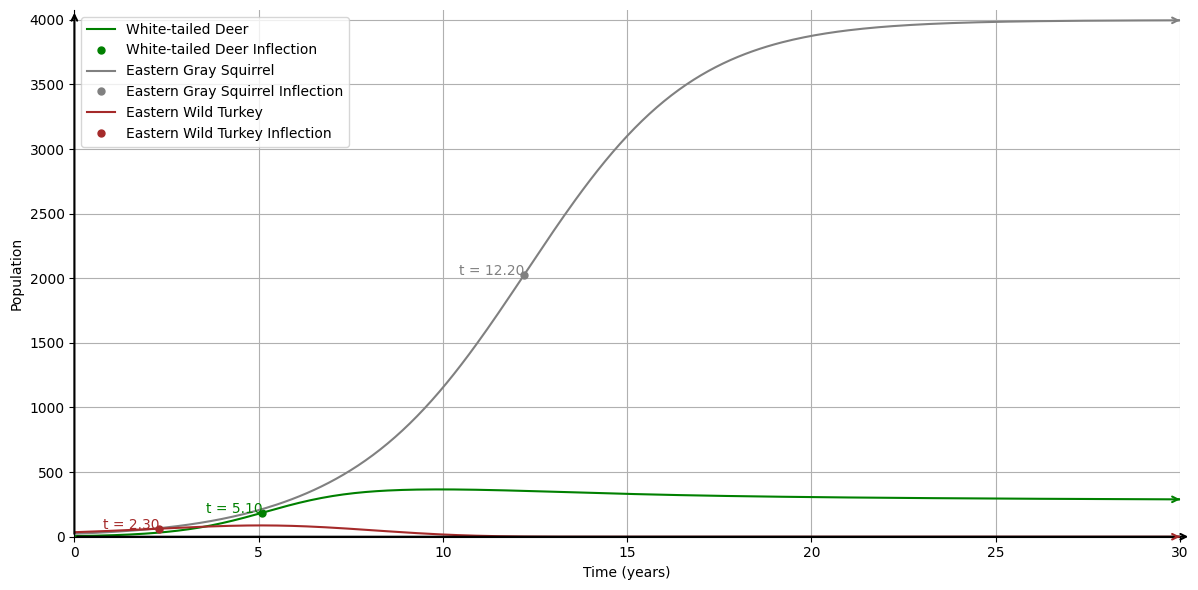

In [143]:
print("Drawing first Figure of Part B")

plt.figure(figsize=(12, 6))

# Draw axes arrows
plt.annotate('', xy=(max(time)+0.3, 0), xytext=(0, 0),
             arrowprops=dict(arrowstyle="->", lw=1.5, color='black', relpos=(0,0)), annotation_clip=False)
plt.annotate('', xy=(0, np.max(P_euler)*1.02), xytext=(0, 0),
             arrowprops=dict(arrowstyle="->", lw=1.5, color='black', relpos=(0,0)), annotation_clip=False)

for idx in range(3):
    plt.plot(time, P_euler[:, idx], '-', label=species_names[idx], color=colors[idx])
    x_end = time[-1]
    x_prev = time[-2]
    y_end = P_euler[-1, idx]
    y_prev = P_euler[-2, idx]

    # Draw arrow at end of curve
    plt.annotate('', xy=(x_end, y_end), xytext=(x_prev, y_prev),
                 arrowprops=dict(arrowstyle='->', color=colors[idx], lw=1.5))

    # Find and plot inflection point
    inflect_idx = find_inflection_point(dPdt[:, idx])
    if inflect_idx is not None:
        inflect_time = time[inflect_idx]
        inflect_pop = P_euler[inflect_idx, idx]
        plt.plot(inflect_time, inflect_pop, 'o', color=colors[idx], markersize=5, label=f'{species_names[idx]} Inflection')
        plt.text(inflect_time, inflect_pop, f't = {inflect_time:.2f}', color=colors[idx], fontsize=10, ha='right')

plt.xlabel("Time (years)")
plt.ylabel("Population")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xlim(0, t_max)
plt.ylim(0, np.max(P_euler)*1.02)
ax = plt.gca()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.show()

Drawing second Figure of Part B


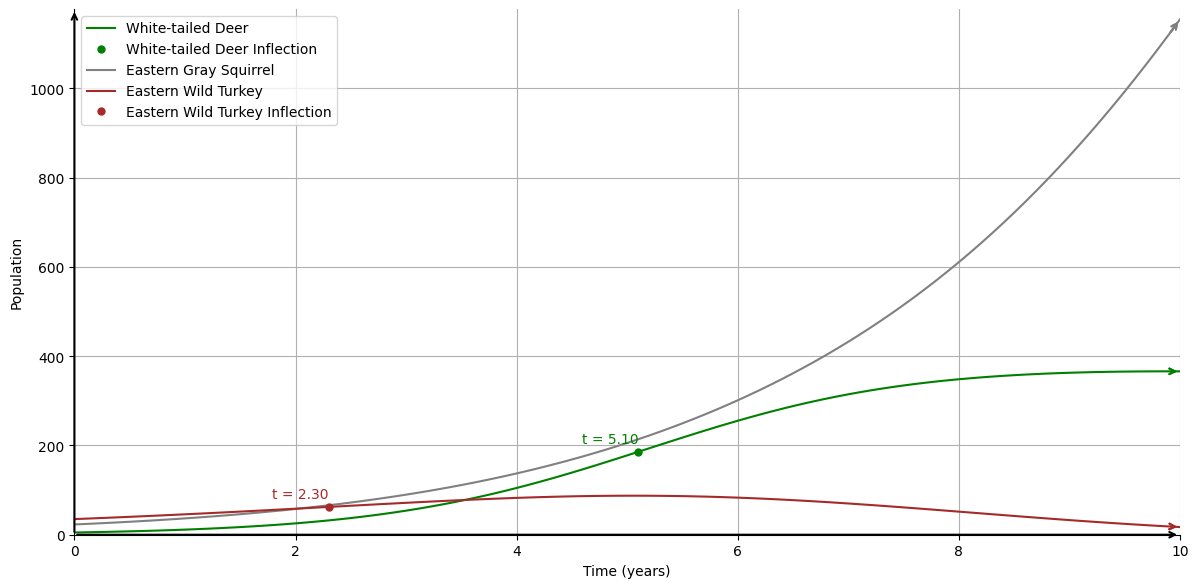

In [144]:
print("Drawing second Figure of Part B")
t_max_fig_2 = 10

plt.figure(figsize=(12, 6))

# Draw axes arrows
plt.annotate('', xy=(t_max_fig_2, 0), xytext=(0, 0),
             arrowprops=dict(arrowstyle="->", lw=1.5, color='black', relpos=(0,0)), annotation_clip=False)
plt.annotate('', xy=(0, np.max(P_euler[time <= t_max_fig_2]) * 1.02), xytext=(0, 0),
             arrowprops=dict(arrowstyle="->", lw=1.5, color='black', relpos=(0,0)), annotation_clip=False)

for idx in range(3):
    # Mask time and data up to t_max_fig_2
    time_mask = time <= t_max_fig_2
    time_trimmed = time[time_mask]
    P_trimmed = P_euler[time_mask, idx]

    plt.plot(time_trimmed, P_trimmed, '-', label=species_names[idx], color=colors[idx])

    # Arrow at end of visible curve
    if len(time_trimmed) >= 2:
        x_end = time_trimmed[-1]
        x_prev = time_trimmed[-2]
        y_end = P_trimmed[-1]
        y_prev = P_trimmed[-2]

    plt.annotate('', xy=(x_end, y_end), xytext=(x_prev, y_prev),
                 arrowprops=dict(arrowstyle='->', color=colors[idx], lw=1.5), clip_on=True)

    # Draw arrow at end of curve
    plt.annotate('', xy=(x_end, y_end), xytext=(x_prev, y_prev),
                 arrowprops=dict(arrowstyle='->', color=colors[idx], lw=1.5), clip_on=True)

    # Find and plot inflection point
    inflect_idx = find_inflection_point(dPdt[:, idx])
    if inflect_idx is not None:
        inflect_time = time[inflect_idx]
        inflect_pop = P_euler[inflect_idx, idx]

        # Only plot inflection point if it is within plot bounds
        if inflect_time <= t_max_fig_2 and inflect_pop <= 4000:
            plt.plot(inflect_time, inflect_pop, 'o', color=colors[idx], markersize=5, label=f'{species_names[idx]} Inflection')
            plt.text(inflect_time, inflect_pop+20, f't = {inflect_time:.2f}', color=colors[idx], fontsize=10, ha='right')


plt.xlabel("Time (years)")
plt.ylabel("Population")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xlim(0, t_max_fig_2)
plt.ylim(0, np.max(P_euler[time <= t_max_fig_2]) * 1.02)
ax = plt.gca()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.show()

In [145]:
#### AFTER THE FLOOD

# Time settings
t_max = 30
h = 0.1
time = np.arange(0, t_max + h, h)
t_target = 15
index_15 = np.where(np.isclose(time, t_target))[0][0]

# Initial populations (before flood)
P_deer_0 = 5
P_squirrel_0 = 23
P_turkey_0 = 35

# Carrying capacities and growth rates (before flood)
L0 = {'deer': 400, 'squirrel': 4000, 'turkey': 500}
k0 = {'deer': 0.9, 'squirrel': 0.5, 'turkey': 0.32}

# Interaction coefficients
c = {
    'deer': {'squirrel': 0.03, 'turkey': 0.04},
    'squirrel': {'deer': 0.01, 'turkey': 0.04},
    'turkey': {'deer': 0.13, 'squirrel': 0.08},
}
d = {
    'deer': {'squirrel': 0.0002, 'turkey': 0.0004},
    'squirrel': {'deer': 0.0002, 'turkey': 0.0005},
    'turkey': {'deer': 0.0011, 'squirrel': 0.0006},
}

# Function to calculate dP/dt
def dP_dt(P, L_dict, k_dict):
    P_deer, P_squirrel, P_turkey = P
    P_dict = {'deer': P_deer, 'squirrel': P_squirrel, 'turkey': P_turkey}
    other_species = {'deer': ['squirrel', 'turkey'], 'squirrel': ['deer', 'turkey'], 'turkey': ['deer', 'squirrel']}
    
    dP = {}
    for sp in ['deer', 'squirrel', 'turkey']:
        j, k = other_species[sp]
        L = L_dict[sp] - c[sp][j] * P_dict[j] - c[sp][k] * P_dict[k]
        k_val = k_dict[sp] - d[sp][j] * P_dict[j] - d[sp][k] * P_dict[k]
        dP[sp] = k_val * P_dict[sp] * (1 - P_dict[sp] / L)
    return np.array([dP['deer'], dP['squirrel'], dP['turkey']])

# Euler’s Method (up to t = 15)
P_euler = np.zeros((len(time), 3))
P_euler[0] = [P_deer_0, P_squirrel_0, P_turkey_0]
dPdt = np.zeros_like(P_euler)

for i in range(1, index_15 + 1):
    dPdt[i-1] = dP_dt(P_euler[i-1], L0, k0)
    P_euler[i] = P_euler[i-1] + h * dPdt[i-1]

dPdt[index_15] = dP_dt(P_euler[index_15], L0, k0)
pop_at_15 = P_euler[index_15]

# Apply the flood effect
P_euler[index_15] = [332 * 0.2, 3101 * 0.15, 50]  # P0 for post-flood
L1 = {'deer': 300, 'squirrel': 1500, 'turkey': 600}
k1 = {'deer': 0.45, 'squirrel': 0.25, 'turkey': 1.2}

# Continue Euler's method after flood
for i in range(index_15 + 1, len(time)):
    dPdt[i-1] = dP_dt(P_euler[i-1], L1, k1)
    P_euler[i] = P_euler[i-1] + h * dPdt[i-1]

dPdt[-1] = dP_dt(P_euler[-1], L1, k1)

# Inflection point function
def find_all_inflection_points(dPdt_species):
    d2Pdt2 = np.diff(dPdt_species) / h
    sign_changes = np.where((d2Pdt2[:-1] > 0) & (d2Pdt2[1:] < 0))[0]
    return sign_changes + 1 if len(sign_changes) > 0 else []


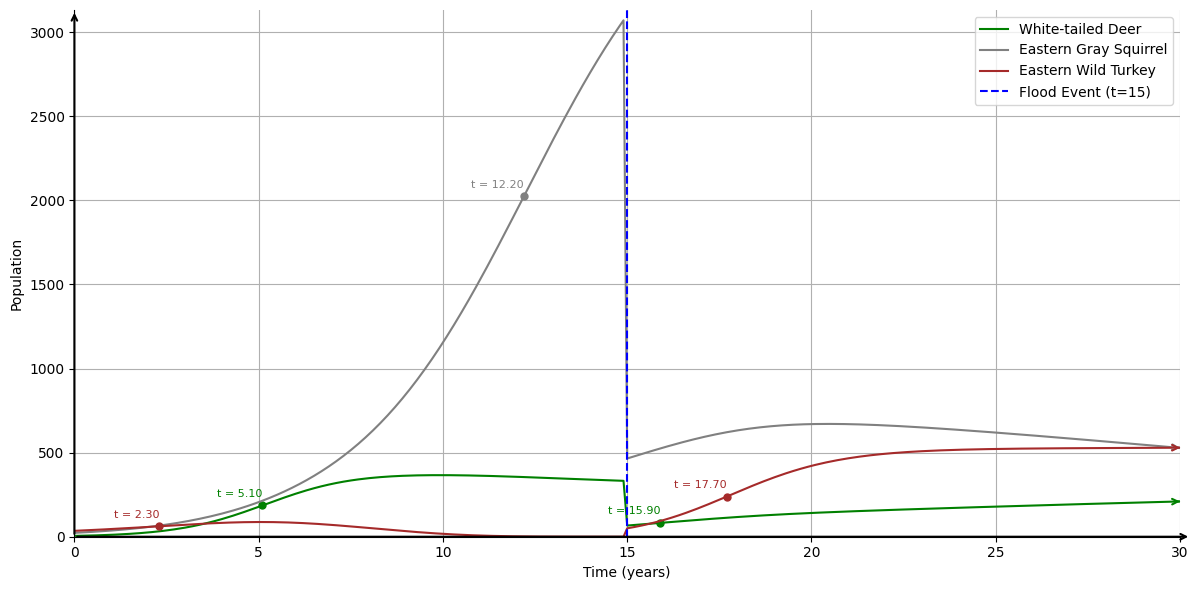

In [146]:
plt.figure(figsize=(12, 6))

plt.annotate('', xy=(max(time)+0.3, 0), xytext=(0, 0),
             arrowprops=dict(arrowstyle="->", lw=1.5, color='black'), annotation_clip=False)
plt.annotate('', xy=(0, np.max(P_euler) * 1.02), xytext=(0, 0),
             arrowprops=dict(arrowstyle="->", lw=1.5, color='black'), annotation_clip=False)

for idx in range(3):
    plt.plot(time, P_euler[:, idx], '-', label=species_names[idx], color=colors[idx])
    x_end = time[-1]
    y_end = P_euler[-1, idx]
    y_prev = P_euler[-2, idx]
    x_prev = time[-2]

    plt.annotate('', xy=(x_end, y_end), xytext=(x_prev, y_prev),
                 arrowprops=dict(arrowstyle='->', color=colors[idx], lw=1.5))

    inflect_indices = find_all_inflection_points(dPdt[:, idx])
    for i, inflect_idx in enumerate(inflect_indices):
        if i >= 2:
            break
        inflect_time = time[inflect_idx]
        inflect_pop = P_euler[inflect_idx, idx]
        plt.plot(inflect_time, inflect_pop, 'o', color=colors[idx], markersize=5)
        plt.text(inflect_time, inflect_pop + 50,
                f't = {inflect_time:.2f}', color=colors[idx], fontsize=8, ha='right')


plt.axvline(x=t_target, color='blue', linestyle='--', label='Flood Event (t=15)')
plt.xlabel("Time (years)")
plt.ylabel("Population")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xlim(0, t_max)
plt.ylim(0, np.max(P_euler) * 1.02)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.show()


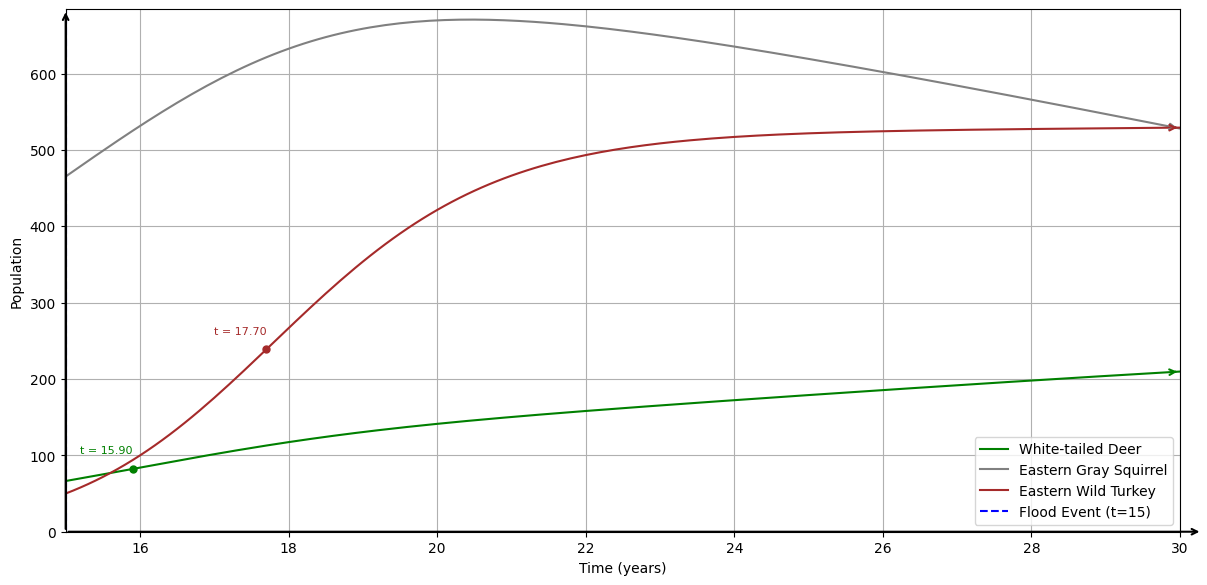

In [147]:
plt.figure(figsize=(12, 6))

plt.annotate('', xy=(max(time)+0.3, 0), xytext=(15, 0),
             arrowprops=dict(arrowstyle="->", lw=1.5, color='black'), annotation_clip=False)
plt.annotate('', xy=(15, np.max(P_euler[time >= t_target]) * 1.02), xytext=(15, 0),
             arrowprops=dict(arrowstyle="->", lw=1.5, color='black'), annotation_clip=False)

for idx in range(3):
    plt.plot(time[time >= t_target], P_euler[time >= t_target, idx],  '-', label=species_names[idx], color=colors[idx])
    x_end = time[-1]
    y_end = P_euler[-1, idx]
    y_prev = P_euler[-2, idx]
    x_prev = time[-2]

    plt.annotate('', xy=(x_end, y_end), xytext=(x_prev, y_prev),
                 arrowprops=dict(arrowstyle='->', color=colors[idx], lw=1.5))

    inflect_indices = find_all_inflection_points(dPdt[:, idx])
    for i, inflect_idx in enumerate(inflect_indices):
        if i >= 2:
            break
        inflect_time = time[inflect_idx]
        if inflect_time > t_target:
            inflect_pop = P_euler[inflect_idx, idx]
            plt.plot(inflect_time, inflect_pop, 'o', color=colors[idx], markersize=5)
            plt.text(inflect_time, inflect_pop + 20,
                    f't = {inflect_time:.2f}', color=colors[idx], fontsize=8, ha='right')


plt.axvline(x=t_target, color='blue', linestyle='--', label='Flood Event (t=15)')
plt.xlabel("Time (years)")
plt.ylabel("Population")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xlim(t_target, t_max)
plt.ylim(0, np.max(P_euler[time >= t_target]) * 1.02)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.show()

In [148]:
# Long-term Time settings
t_max = 80
h = 0.1
time = np.arange(0, t_max + h, h)
t_target = 15
index_15 = np.where(np.isclose(time, t_target))[0][0]

# Initial populations (before flood)
P_deer_0 = 5
P_squirrel_0 = 23
P_turkey_0 = 35

# Carrying capacities and growth rates (before flood)
L0 = {'deer': 400, 'squirrel': 4000, 'turkey': 500}
k0 = {'deer': 0.9, 'squirrel': 0.5, 'turkey': 0.32}

# Interaction coefficients
c = {
    'deer': {'squirrel': 0.03, 'turkey': 0.04},
    'squirrel': {'deer': 0.01, 'turkey': 0.04},
    'turkey': {'deer': 0.13, 'squirrel': 0.08},
}
d = {
    'deer': {'squirrel': 0.0002, 'turkey': 0.0004},
    'squirrel': {'deer': 0.0002, 'turkey': 0.0005},
    'turkey': {'deer': 0.0011, 'squirrel': 0.0006},
}

# Function to calculate dP/dt
def dP_dt(P, L_dict, k_dict):
    P_deer, P_squirrel, P_turkey = P
    P_dict = {'deer': P_deer, 'squirrel': P_squirrel, 'turkey': P_turkey}
    other_species = {'deer': ['squirrel', 'turkey'], 'squirrel': ['deer', 'turkey'], 'turkey': ['deer', 'squirrel']}
    
    dP = {}
    for sp in ['deer', 'squirrel', 'turkey']:
        j, k = other_species[sp]
        L = L_dict[sp] - c[sp][j] * P_dict[j] - c[sp][k] * P_dict[k]
        k_val = k_dict[sp] - d[sp][j] * P_dict[j] - d[sp][k] * P_dict[k]
        dP[sp] = k_val * P_dict[sp] * (1 - P_dict[sp] / L)
    return np.array([dP['deer'], dP['squirrel'], dP['turkey']])

# Euler’s Method (up to t = 15)
P_euler = np.zeros((len(time), 3))
P_euler[0] = [P_deer_0, P_squirrel_0, P_turkey_0]
dPdt = np.zeros_like(P_euler)

for i in range(1, index_15 + 1):
    dPdt[i-1] = dP_dt(P_euler[i-1], L0, k0)
    P_euler[i] = P_euler[i-1] + h * dPdt[i-1]

dPdt[index_15] = dP_dt(P_euler[index_15], L0, k0)
pop_at_15 = P_euler[index_15]

# Apply the flood effect
P_euler[index_15] = [332 * 0.2, 3101 * 0.15, 50]  # P0 for post-flood
L1 = {'deer': 300, 'squirrel': 1500, 'turkey': 600}
k1 = {'deer': 0.45, 'squirrel': 0.25, 'turkey': 1.2}

# Continue Euler's method after flood
for i in range(index_15 + 1, len(time)):
    dPdt[i-1] = dP_dt(P_euler[i-1], L1, k1)
    P_euler[i] = P_euler[i-1] + h * dPdt[i-1]

dPdt[-1] = dP_dt(P_euler[-1], L1, k1)

# Inflection point function
def find_all_inflection_points(dPdt_species):
    d2Pdt2 = np.diff(dPdt_species) / h
    sign_changes = np.where((d2Pdt2[:-1] > 0) & (d2Pdt2[1:] < 0))[0]
    return sign_changes + 1 if len(sign_changes) > 0 else []


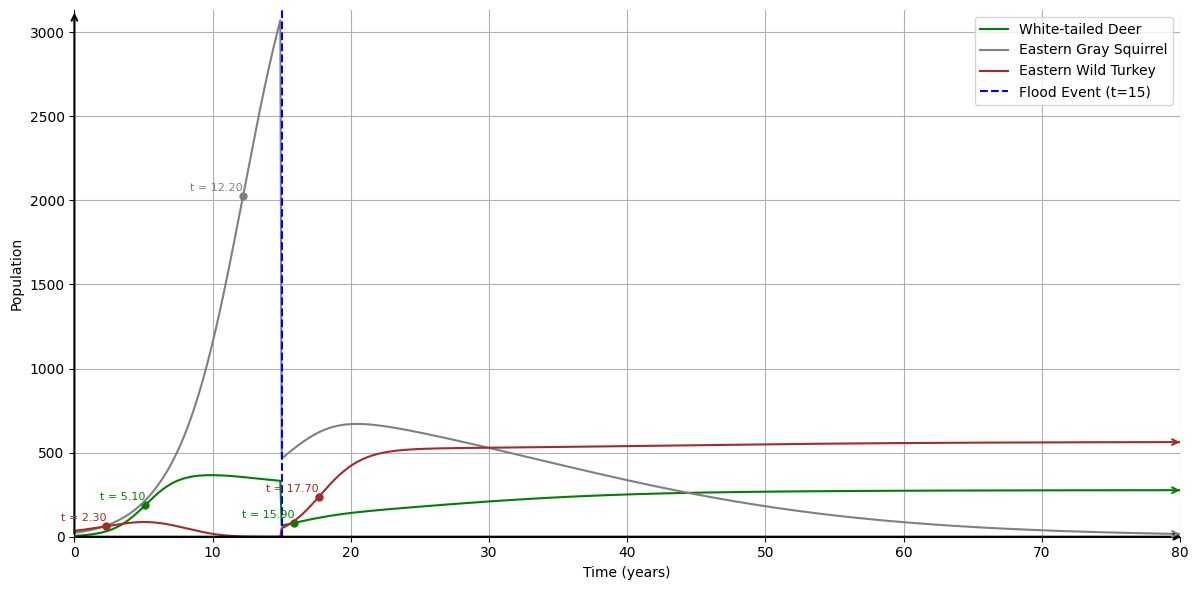

In [153]:
plt.figure(figsize=(12, 6))

plt.annotate('', xy=(max(time)+0.3, 0), xytext=(0, 0),
             arrowprops=dict(arrowstyle="->", lw=1.5, color='black'), annotation_clip=False)
plt.annotate('', xy=(0, np.max(P_euler) * 1.02), xytext=(0, 0),
             arrowprops=dict(arrowstyle="->", lw=1.5, color='black'), annotation_clip=False)

for idx in range(3):
    plt.plot(time, P_euler[:, idx], '-', label=species_names[idx], color=colors[idx])
    x_end = time[-1]
    y_end = P_euler[-1, idx]
    y_prev = P_euler[-2, idx]
    x_prev = time[-2]

    plt.annotate('', xy=(x_end, y_end), xytext=(x_prev, y_prev),
                 arrowprops=dict(arrowstyle='->', color=colors[idx], lw=1.5))

    inflect_indices = find_all_inflection_points(dPdt[:, idx])
    for i, inflect_idx in enumerate(inflect_indices):
        if i >= 2:
            break
        inflect_time = time[inflect_idx]
        inflect_pop = P_euler[inflect_idx, idx]
        plt.plot(inflect_time, inflect_pop, 'o', color=colors[idx], markersize=5)
        plt.text(inflect_time, inflect_pop + 30,
                f't = {inflect_time:.2f}', color=colors[idx], fontsize=8, ha='right')


plt.axvline(x=t_target, color='blue', linestyle='--', label='Flood Event (t=15)')
plt.xlabel("Time (years)")
plt.ylabel("Population")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xlim(0, t_max)
plt.ylim(0, np.max(P_euler) * 1.02)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.show()